In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [4]:
df = pd.read_csv('../../data/training.csv') 

In [5]:
print(df.columns) #attributes

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


### missing value

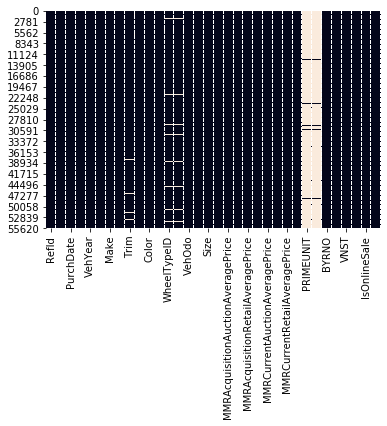

In [37]:
sns.heatmap(df.isnull(), cbar=False)

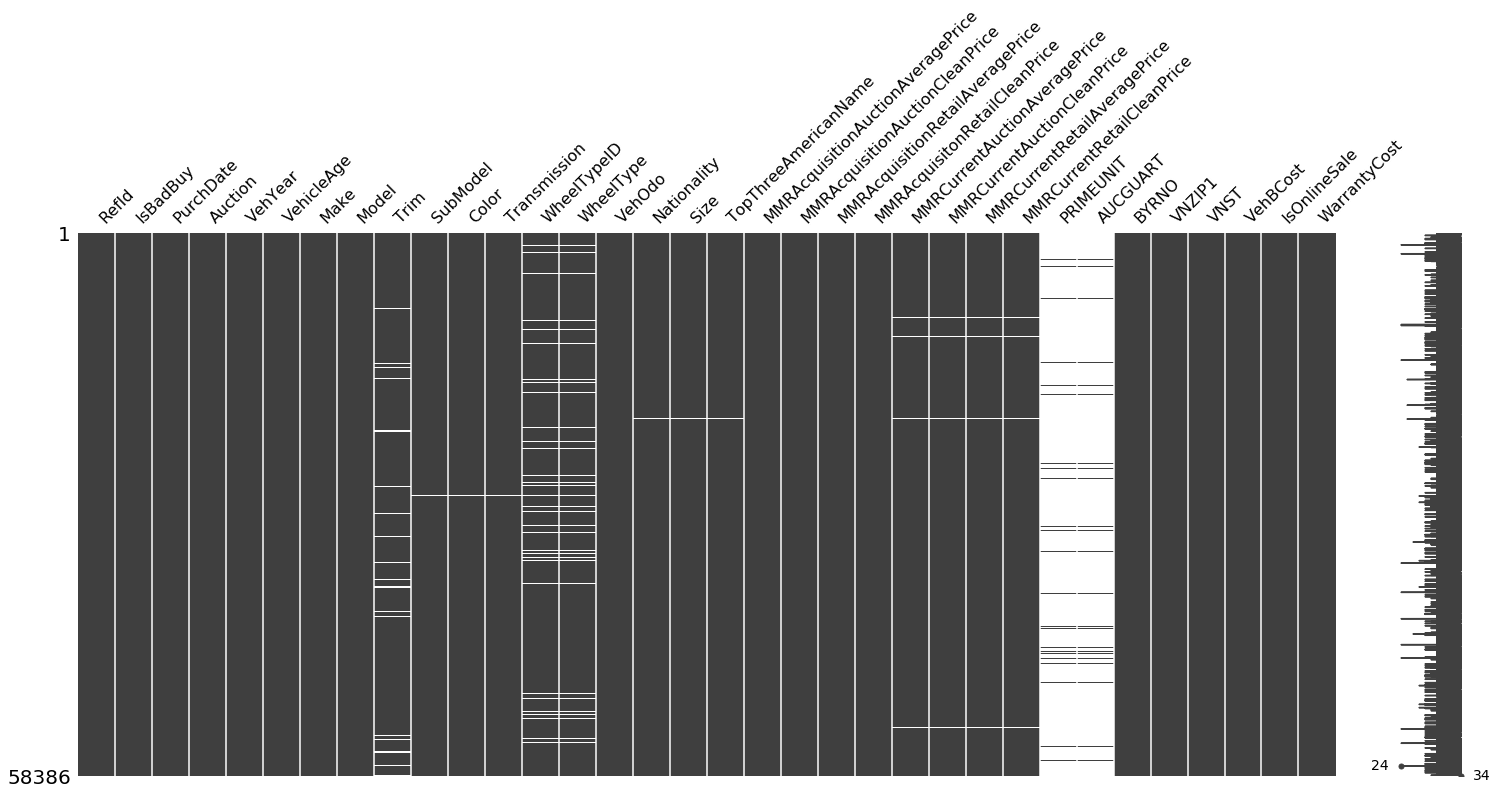

In [3]:
msno.matrix(df)

In [ ]:
del df['RefId']
del df['VNZIP1']
del df['VehYear']
del df['PurchDate']
del df['TopThreeAmericanName']
del df['WheelType']

### - Check duplicates in RefId

In [5]:
df['RefId'].value_counts()[df['RefId'].value_counts() > 1] 

Series([], Name: RefId, dtype: int64)

No duplicates for RefId

### - Check IsBadBuy
<ul>
<li>0: good buy
<li>1: bad buy
</ul>

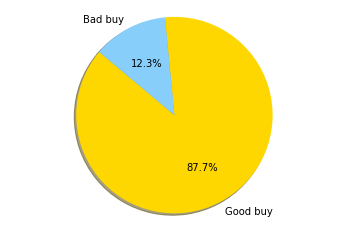

In [6]:
#Pie chart of data types
# Data to plot
labels = 'Good buy', 'Bad buy'
sizes = [51178, 7208]
colors = ['gold', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

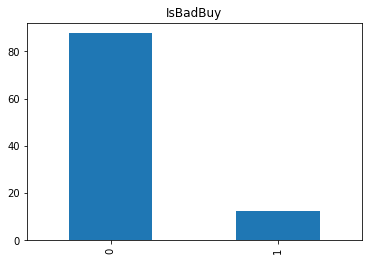

In [7]:
(df['IsBadBuy'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='IsBadBuy')
plt.show() 

<p>In the data set there is an unbalanced distribution for IsBadBuy values.</p>
<p>
During the construction and evaluation of classification models, yes
they will have to balance the values ​​of this attribute so as to be able to evaluate their efficiency with the different distributions
of class values.</p>

### - Check Auction

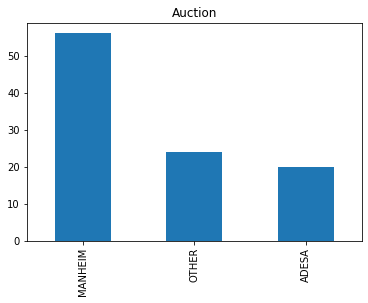

In [8]:
(df['Auction'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Auction')
plt.show() 

<ul>
    <li> MANHEIM is located in North America, Europe, Asia and Australia.
    <li> ADESA is located in North America and Canada
</ul>

### - Check VehicleAge

In [112]:
df['VehicleAge'].unique()

array([2, 3, 4, 5, 1, 7, 6, 8, 9, 0], dtype=int64)

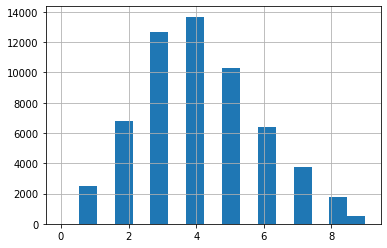

In [111]:
df['VehicleAge'].hist(bins=17)

<p>The distribution of vehicle age values presents a peak of occurrences for 4 years</p>

In [42]:
# vage
vage_xt = pd.crosstab(df['VehicleAge'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable
#vage_xt

In [10]:
# Normalize the cross tab to sum to 1:
vage_xt_pct = vage_xt.div(vage_xt.sum(1).astype(float), axis=0)
#vage_xt_pct

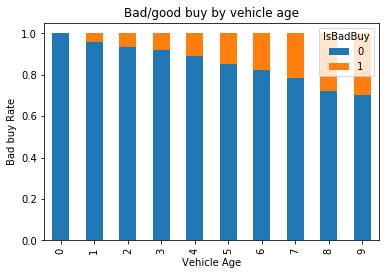

In [11]:
#Then I can visualize it with a bar plot (staked: different values in the same bar)
vage_xt_pct.plot(kind='bar', stacked=True, 
                   title='Bad/good buy by vehicle age')
plt.xlabel('Vehicle Age')
plt.ylabel('Bad buy Rate')
plt.show()

<p>The percentage of incorrect purchases increases with the age of the vehicle.</p> 

### - Check Make

In [12]:
df['Make'].unique() #all values of an attribute

array(['KIA', 'DODGE', 'FORD', 'CHRYSLER', 'NISSAN', 'SUZUKI', 'PONTIAC',
       'CHEVROLET', 'SATURN', 'BUICK', 'MITSUBISHI', 'HONDA', 'HYUNDAI',
       'MERCURY', 'GMC', 'JEEP', 'OLDSMOBILE', 'MAZDA', 'TOYOTA', 'ISUZU',
       'ACURA', 'VOLVO', 'INFINITI', 'SCION', 'CADILLAC', 'LINCOLN',
       'VOLKSWAGEN', 'SUBARU', 'MINI', 'LEXUS', 'PLYMOUTH',
       'TOYOTA SCION', 'HUMMER'], dtype=object)

<p>Scion is a Toyota brand of cars. 
There is no manufacturer on the market with both
names and in fact in the dataset it occurred only once, confirming its nature as a semantic error. The value
could be corrected in "SCION" since he is the Toyota manufacturer.</p>
<p>Note:</p>
<ul>
    <li> SCION is a TOYOTA brand of cars. There is no manufacturer on the market with both names and in fact in the dataset it occurred only once, confirming its nature as a semantic error. The value could be corrected in "SCION" since he is the Toyota manufacturer.
    <li> The OLDSMOBILE is a historic US car manufacturer and has been part of the General Motors   Group for almost all of its existence (1897-2004)
    <li> GMC Truck, is a brand used on trucks, vans, off-road vehicles
    <li> ACURA is the brand used by Honda for some models of upper-class cars  
    <li> PONTIAC was a car brand created for commercial purposes by the General Motors group (1926-2010)
    <li> The SATURN Corporation was a division of General Motors mainly dedicated to compact and mid-size cars (1985-2010)
    <li> BUICK was designed to produce high-end cars
    <li> INFINITI is the luxury car brand of Japanese automotive manufacturer Nissan Motor
    <li> CADILLAC is a luxury car brand belonging to the General Motors group.
    <li> LINCOLN is the luxury division of car manufacturer Ford.
    <li> PLYMOUTH has been an American car brand belonging to Chrysler (1928-2001) (occured only once - no problem)
    <li> HUMMER was a brand of US off-road vehicles and SUVs (1992-2010)
</ul>

In [13]:
#TOYOTA SCION only one row
df[df['Make'] == 'TOYOTA SCION']

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
42627,17866,0,10/13/2009,OTHER,2005,4,TOYOTA SCION,XA 1.5L I4 EFI,Bas,4D HATCHBACK,...,6563.0,7931.0,NaN,NaN,3453,84104,UT,5560.0,0,594


In [14]:
df['Make'].value_counts() 

CHEVROLET       13842
DODGE           10355
FORD             9000
CHRYSLER         7093
PONTIAC          3421
KIA              2006
SATURN           1698
NISSAN           1687
HYUNDAI          1444
JEEP             1287
SUZUKI           1062
TOYOTA            905
MITSUBISHI        822
MAZDA             774
MERCURY           739
BUICK             562
GMC               502
HONDA             407
OLDSMOBILE        198
ISUZU             110
VOLKSWAGEN        104
SCION             102
LINCOLN            80
INFINITI           36
VOLVO              31
LEXUS              27
CADILLAC           25
ACURA              25
SUBARU             22
MINI               17
PLYMOUTH            1
HUMMER              1
TOYOTA SCION        1
Name: Make, dtype: int64

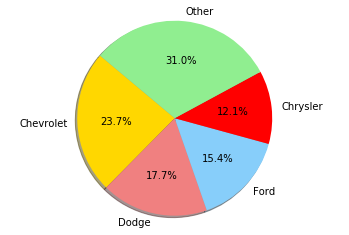

In [15]:
#Pie chart of Make
# Data to plot
labels = 'Chevrolet', 'Dodge', 'Ford', 'Chrysler', 'Other'
sizes = [13842, 10355, 9000, 7093, 18096]
colors = ['gold', 'lightcoral', 'lightskyblue', 'red', 'lightgreen']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<p>The distribution of attribute values for manufacturers presents a preponderance of automobiles a
Chevrolet brand, followed by Dodge, Ford and Chrysler. American cars are the majority (see later).</p>

In [16]:
#Models for LINCOLN
df[df['Make'] == 'LINCOLN']['Model'].unique()

array(['TOWN CAR 4.6L V8 EFI', 'TOWN CAR', 'NAVIGATOR 2WD V8',
       'NAVIGATOR 2WD V8 5.4', 'ZEPHYR', 'LS V6', 'CONTINENTAL',
       'NAVIGATOR 4WD V8', 'AVIATOR 2WD V8', 'AVIATOR AWD V8', 'LS V8',
       'CONTINENTAL 4.6L V8', 'ZEPHYR 3.0L V6 SFI', 'AVIATOR 2WD V8 4.6L',
       'LS V8 3.9L V8 EFI', 'LS V6 3.0L V6 EFI DO', 'LS V6 3.0L V6 EFI'],
      dtype=object)

In [17]:
#m
m_xt = pd.crosstab(df['Make'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable
#m_xt

In [18]:
# Normalize the cross tab to sum to 1:
m_xt_pct = m_xt.div(m_xt.sum(1).astype(float), axis=0)
#m_xt_pct

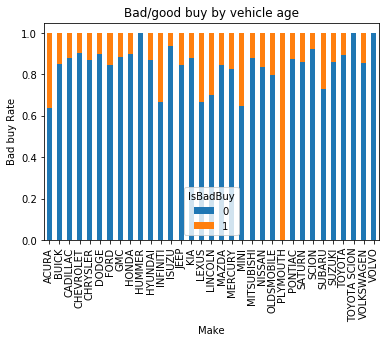

In [19]:
#Then I can visualize it with a bar plot (staked: different values in the same bar)
m_xt_pct.plot(kind='bar', stacked=True, 
                   title='Bad/good buy by vehicle age')
plt.xlabel('Make')
plt.ylabel('Bad buy Rate')
plt.show()

### - Check Model

In [96]:
df['Model'].value_counts()[df['Model'].value_counts() < 5]

RODEO 2WD V6            1
VIBE AWD                1
PATHFINDER 4WD V6 4.    1
STRATUS V6 2.7L V6 S    1
MALIBU HYBRID           1
                       ..
LS V6 3.0L V6 EFI       1
RELAY 2WD V6 3.9L V6    1
FOCUS 2.3L I4 MFI       1
2500HD SIERRA PICKUP    1
INTREPID 3.5L V6 EFI    1
Name: Model, Length: 174, dtype: int64

In [5]:
#Models for CHRYSLER
df[df['Make'] == 'CHRYSLER']['Model'].value_counts()

PT CRUISER              1845
SEBRING 4C               941
PT CRUISER 2.4L I4 S     909
TOWN & COUNTRY FWD V     398
SEBRING V6               389
SEBRING 4C 2.4L I4 E     373
PACIFICA FWD             364
TOWN & COUNTRY 2WD V     305
PACIFICA FWD 3.5L V6     241
300                      191
PT CRUISER 2.4L I4 M     173
SEBRING V6 2.7L V6 M     139
300 2.7L V6 MPI          136
SEBRING 4C 2.4L I4 S     118
PACIFICA FWD 3.8L V6     100
PACIFICA AWD              81
PACIFICA AWD 3.5L V6      75
PT CRUISER 2.4L I-4       69
300 3.5L V6 MPI / SM      23
SEBRING 4C 2.4L I-4       23
SEBRING V6 MFI V6 2.      18
CONCORDE                  17
VOYAGER FWD V6 3.3L       16
300 3.5L V6 MPI           16
SEBRING V6 3.0L V6 M      16
VOYAGER FWD V6            14
PACIFICA AWD 4.0L V6      13
VOYAGER FWD 4C 2.4L       12
CONCORDE 3.5L V6 MPI      12
PACIFICA FWD 4.0L V6      12
300M                      10
300 3.5L / 6.0L V12        9
PT CRUISER 2.4L I4 D       6
300M 3.5L V6 MPI           5
VOYAGER FWD 4C

<p> 'Pacifica' could be transform in 'PACIFICA' (CHRYSLER model)</p>

### - Check Trim

In [9]:
df['Trim'].unique()

array(['EX', 'SXT', 'SE', 'S', 'Bas', nan, 'SLT', 'LS', 'XE', 'XLS',
       'Lar', 'Cus', 'ES', 'XL', 'Lim', 'LT', 'LX', 'Tou', 'Cla', 'SES',
       'SS', 'GLS', '150', 'GS', '2', 'SEL', 'L30', 'LE', 'Spo', 'SLE',
       'Spy', 'ZX4', 'GT', 'GL', '3', 'LXi', 'Nor', 'XLT', 'SR5', 'CX',
       'W/T', 'Her', 'CE', 'ZTS', 'T5', 'SL2', 'ST', 's', 'Adv', 'i',
       'STX', 'Lux', 'SL1', 'ZX3', 'CXL', 'ZX5', '1', 'GLE', 'L20', 'DS',
       'Edd', 'SV6', 'Ent', 'Edg', 'Ren', 'SC2', 'Exe', 'GTC', 'LW3',
       'Z71', 'SE-', 'C', 'Pre', 'Hig', 'SX', 'SL', 'L10', 'Sig', 'GTP',
       'FX4', 'ZXW', 'Kin', 'VP', 'R/T', 'DX', 'Val', 'X', 'XR', 'XS',
       'DE', 'SC1', 'Max', 'GTS', 'ZX2', 'LTZ', 'eL', 'Pro', 'eC', 'EX-',
       'CXS', 'JLX', 'OZ', 'XRS', 'GX', 'ZTW', 'Ove', '3 R', 'GXP', 'SVT',
       'Plu', 'Sta', 'Spe', 'LW2', 'LL', 'L', 'GXE', 'Car', 'Den', 'Ult',
       'RS', 'RT', 'Dur', 'Cin', 'Ral', 'Si', 'Maz', '250', 'JLS', 'Xsp',
       'ZR2', 'Hyb', 'Out'], dtype=object)

### - Check SubModel

In [10]:
df['SubModel'].unique()

array(['4D SEDAN EX', '4D SEDAN SXT FFV', '4D WAGON', 'PASSENGER 3.9L',
       'MINIVAN 3.3L', '4D SEDAN', '4D SEDAN SE1', '4D SUV 4.7L',
       '4D SEDAN LS', '4D SEDAN LS CLASSIC', '4D SPORT UTILITY',
       '4D SUV 4.7L SLT', '2D COUPE', 'EXT CAB 4.3L', '4D SEDAN XE',
       '4D SUV 4.0L SPORT TRAC', 'PASSENGER 3.9L SE', 'QUAD CAB 4.7L',
       '4D SEDAN CUSTOM', '4D SPORT UTILITY EX', '4D SEDAN ES',
       'REG CAB 4.2L XL', '4D SEDAN SE', '4D SEDAN SXT',
       'EXT CAB 4.2L W/T', '4D SUV 4.0L FFV LIMITED', '4D SEDAN LT',
       'MINIVAN 3.8L SXT', '4D SEDAN LX AUTO', 'PASSENGER 3.9L LX',
       '4D SUV 4.8L', '4D SUV LS', '4D SEDAN CLASSIC', '4D SEDAN TOURING',
       '4D SEDAN SES', '4D SUV 2.2L LS', '4D SEDAN LT 3.5L',
       '4D SUV 4.2L LS', '4D SEDAN LIMITED', '2D COUPE SS',
       '4D SEDAN GLS', '4D UTILITY 5.3L FFV', '4D SPORT',
       'MINIVAN 2.4L SE', '4D SPORT UTILITY LS', '4D SEDAN GS',
       '4D SEDAN TOURING TURBO', '4D SEDAN LEVEL 2', '4D SEDAN SEL',
       '4D S

<p>Ci possono essere errori di battitura come '2D COUPE LIMTED'</p>

### - Check Color

In [12]:
df['Color'].unique()

array(['BLUE', 'SILVER', 'BLACK', 'BROWN', 'WHITE', 'MAROON', 'RED',
       'GREY', 'GOLD', 'GREEN', 'OTHER', 'ORANGE', 'BEIGE', 'PURPLE',
       'YELLOW', 'NOT AVAIL', nan], dtype=object)

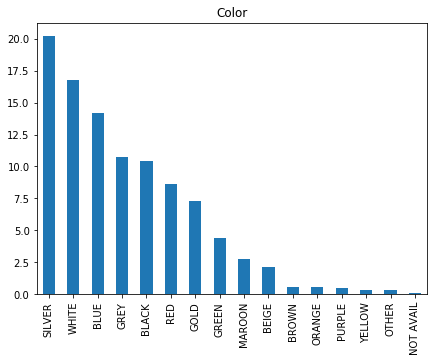

In [15]:
(df['Color'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Color', figsize=(7,5))
plt.show() 

### - Check Transmission

In [16]:
df['Transmission'].value_counts()

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

<p>'Manual' must be change in 'MANUAL'</p>

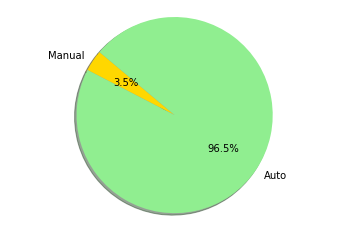

In [20]:
#Pie chart of Transmission
# Data to plot
labels = 'Manual', 'Auto'
sizes = [2048, 56330]
colors = ['gold', 'lightgreen']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<p>In the training set there is also an imbalance for the values of the transmission</p>

In [30]:
df[df['Nationality']=='AMERICAN']['Transmission'].value_counts()

AUTO      47513
MANUAL     1279
Name: Transmission, dtype: int64

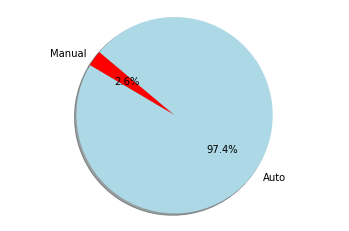

In [51]:
#Pie chart of Transmission in American Cars
# Data to plot
labels = 'Manual', 'Auto'
sizes = [1279, 47513]
colors = ['red', 'lightblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<p>The majority of american cars have the 'AUTO' value for Transmission.</p>

In [32]:
#df[df['Transmission'].isnull()]['Nationality']

<p>In Transmission there are 8 missing values, but we can fill the value with 'AUTO' because 
the missing value is found only in American cars.</p>

### - Check WheelTypeID

In [34]:
df['WheelTypeID'].value_counts()

1.0    28735
2.0    26485
3.0      589
0.0        4
Name: WheelTypeID, dtype: int64

In [36]:
#1.0 - Alloy
df[df['WheelTypeID']==1.0]['WheelType'].unique()

array(['Alloy'], dtype=object)

In [37]:
#2.0 - Covers
df[df['WheelTypeID']==2.0]['WheelType'].unique()

array(['Covers'], dtype=object)

In [39]:
#3.0 - Special
df[df['WheelTypeID']==3.0]['WheelType'].unique()

array(['Special'], dtype=object)

In [41]:
#0.0 - nan
df[df['WheelTypeID']==0.0]['WheelType'].unique()

array([nan], dtype=object)

In [6]:
df[df['WheelTypeID'].isnull()]['WheelType'].unique()

array([nan], dtype=object)

<ul>
    <li> 1.0 - Alloy
    <li> 2.0 - Covers
    <li> 3.0 - Special
    <li> 0.0 - nan (4)
</ul>

### - Check WheelType

In [42]:
df['WheelType'].value_counts()

Alloy      28735
Covers     26485
Special      589
Name: WheelType, dtype: int64

In [43]:
#Alloy - 1.0
df[df['WheelType']=='Alloy']['WheelTypeID'].unique()

array([1.])

In [45]:
#Covers - 2.0
df[df['WheelType']=='Covers']['WheelTypeID'].unique()

array([2.])

In [46]:
#Special - 3.0
df[df['WheelType']=='Special']['WheelTypeID'].unique()

array([3.])

In [48]:
#nan - nan/0.0
df[df['WheelType'].isnull()]['WheelTypeID'].unique()

array([nan,  0.])

<p>Forse i WheelTypeID a 0.0 non sono altro che nan</p>

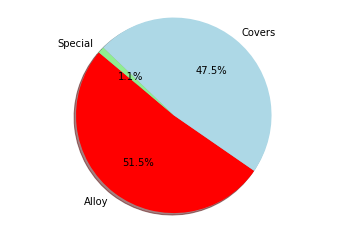

In [52]:
#Pie chart of Transmission in American Cars
# Data to plot
labels = 'Alloy', 'Covers', 'Special'
sizes = [28735, 26485, 589]
colors = ['red', 'lightblue', 'lightgreen']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [69]:
df[df['IsBadBuy']==0]['WheelType'].value_counts()

Alloy      25546
Covers     24363
Special      521
Name: WheelType, dtype: int64

In [70]:
df[df['IsBadBuy']==1]['WheelType'].value_counts()

Alloy      3189
Covers     2122
Special      68
Name: WheelType, dtype: int64

### - Check VehOdo

In [86]:
#df['VehOdo'].value_counts()

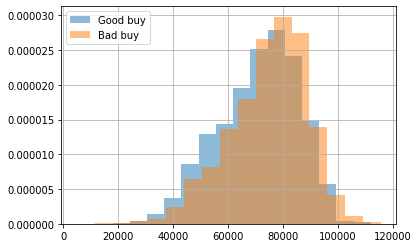

In [85]:
df[df['IsBadBuy']==0]['VehOdo'].hist(bins=17, 
                                   label='Good buy', alpha=0.5, density=True)
df[df['IsBadBuy']==1]['VehOdo'].hist(bins=17,
                                  label='Bad buy', alpha=0.5, density=True)
plt.legend()
plt.show()

<p>Bad purchases are more frequent in cars that have done more miles.</p>

### - Check Nationality

In [87]:
df['Nationality'].unique()

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER', nan],
      dtype=object)

In [88]:
df['Nationality'].value_counts()

AMERICAN          48800
OTHER ASIAN        6435
TOP LINE ASIAN     2995
OTHER               152
Name: Nationality, dtype: int64

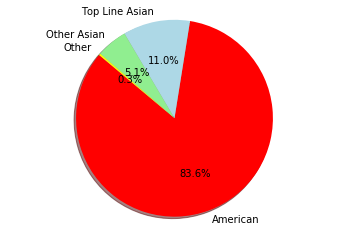

In [89]:
#Pie chart of Nationality
# Data to plot
labels = 'American', 'Top Line Asian', 'Other Asian', 'Other'
sizes = [48800, 6435, 2995, 152]
colors = ['red', 'lightblue', 'lightgreen', 'yellow']
explode = (0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [90]:
df[df['Nationality']=='OTHER']['Make'].value_counts()

VOLKSWAGEN    104
VOLVO          31
MINI           17
Name: Make, dtype: int64

In [91]:
df[df['Nationality'].isnull()]['Make'].value_counts()

JEEP     2
GMC      1
DODGE    1
Name: Make, dtype: int64

In [93]:
# Pclass
n_xt = pd.crosstab(df['Nationality'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable
n_xt

IsBadBuy,0,1
Nationality,,
AMERICAN,42880,5920
OTHER,131,21
OTHER ASIAN,5581,854
TOP LINE ASIAN,2582,413


In [94]:
# Normalize the cross tab to sum to 1:
n_xt_pct = n_xt.div(n_xt.sum(1).astype(float), axis=0)
n_xt_pct

IsBadBuy,0,1
Nationality,,
AMERICAN,0.878689,0.121311
OTHER,0.861842,0.138158
OTHER ASIAN,0.867288,0.132712
TOP LINE ASIAN,0.862104,0.137896


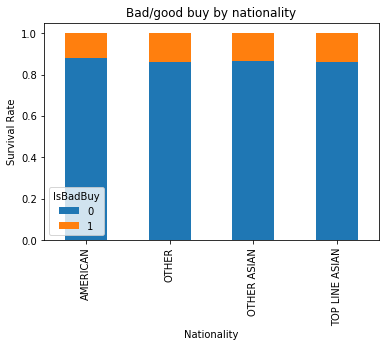

In [95]:
#Then I can visualize it with a bar plot (staked: different values in the same bar)
n_xt_pct.plot(kind='bar', stacked=True, 
                   title='Bad/good buy by nationality')
plt.xlabel('Nationality')
plt.ylabel('Survival Rate')
plt.show()

<ul>
    <li> American cars are predominant.
    <li> In OTHER there are all European cars.
    <li> The four missing values can be replaced with AMERICAN.
</ul>

### - Check Size

In [96]:
df['Size'].value_counts()

MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64

### - Check TopThreeAmericanName

In [97]:
df['TopThreeAmericanName'].value_counts()

GM          20248
CHRYSLER    18733
FORD         9819
OTHER        9582
Name: TopThreeAmericanName, dtype: int64

In [99]:
df[df['TopThreeAmericanName']=='GM']['Make'].value_counts()

CHEVROLET     13842
PONTIAC        3421
SATURN         1698
BUICK           562
GMC             501
OLDSMOBILE      198
CADILLAC         25
HUMMER            1
Name: Make, dtype: int64

In [100]:
df[df['TopThreeAmericanName']=='CHRYSLER']['Make'].value_counts()

DODGE       10354
CHRYSLER     7093
JEEP         1285
PLYMOUTH        1
Name: Make, dtype: int64

In [101]:
df[df['TopThreeAmericanName']=='FORD']['Make'].value_counts()

FORD       9000
MERCURY     739
LINCOLN      80
Name: Make, dtype: int64

In [98]:
df[df['TopThreeAmericanName'].isnull()]['Make'].value_counts()

JEEP     2
GMC      1
DODGE    1
Name: Make, dtype: int64

<p>We can fill these missing values with:</p>
<ul>
    <li> JEEP - CHRYSLER
    <li> GMC - GM
    <li> DODGE - CHRYSLER
</ul>

### - Check VNST

In [18]:
x = df['VNST'].unique()
b = []
for a in range (0,37):
    b.append(x[a])
    
stat = pd.Series(b)
v = np.array([8317,2898,4966,10880,3394,160,1965,1415,443,5673,408,5611,4052,398,1327,930,376,699,591,673,548,277,384,
              622,162,202,261,51,222,112,183,11,80,12,23,56,4])
val = pd.Series(v)

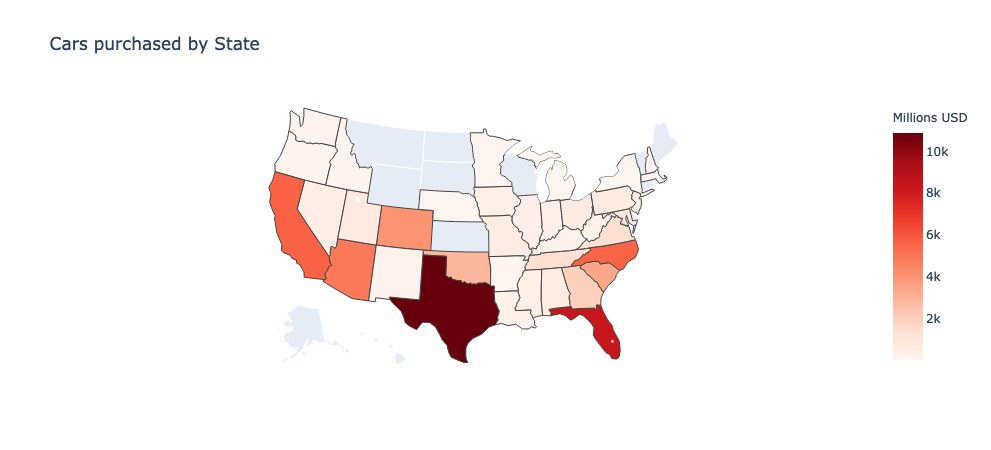

In [17]:
ff = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
fig = go.Figure(data=go.Choropleth(
    locations=stat, # Spatial coordinates
    z = val.astype(int), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Cars purchased by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [102]:
df['VNST'].unique()

array(['FL', 'OK', 'AZ', 'TX', 'SC', 'OR', 'GA', 'TN', 'NV', 'CA', 'MS',
       'NC', 'CO', 'IA', 'VA', 'MD', 'IL', 'UT', 'MO', 'PA', 'AL', 'LA',
       'IN', 'OH', 'ID', 'NM', 'NJ', 'MN', 'WV', 'WA', 'KY', 'MA', 'NH',
       'MI', 'NE', 'AR', 'NY'], dtype=object)

In [103]:
df['VNST'].value_counts()

TX    10880
FL     8317
CA     5673
NC     5611
AZ     4966
CO     4052
SC     3394
OK     2898
GA     1965
TN     1415
VA     1327
MD      930
UT      699
PA      673
OH      622
MO      591
AL      548
NV      443
MS      408
IA      398
IN      384
IL      376
LA      277
NJ      261
WV      222
NM      202
KY      183
ID      162
OR      160
WA      112
NH       80
AR       56
MN       51
NE       23
MI       12
MA       11
NY        4
Name: VNST, dtype: int64

### - Check VehBCost

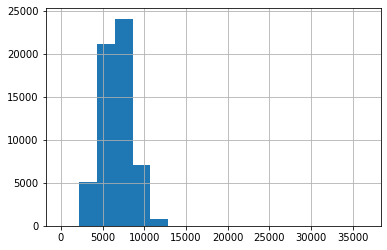

In [111]:
df['VehBCost'].hist(bins=17)

In [108]:
df['VehBCost'].mean() #media

6730.00833453225

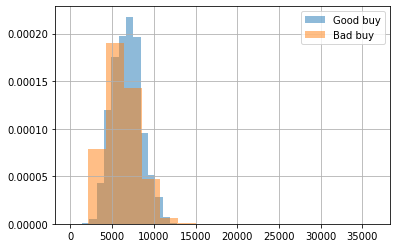

In [113]:
df[df['IsBadBuy']==0]['VehBCost'].hist(bins=17, 
                                   label='Good buy', alpha=0.5, density=True)
df[df['IsBadBuy']==1]['VehBCost'].hist(bins=17,
                                  label='Bad buy', alpha=0.5, density=True)
plt.legend()
plt.show()

### - Check IsOnlineSale

In [115]:
df['IsOnlineSale'].value_counts()

0    56887
1     1499
Name: IsOnlineSale, dtype: int64

In [34]:
df[df['IsOnlineSale']==0]['IsBadBuy'].value_counts()

0    49852
1     7035
Name: IsBadBuy, dtype: int64

In [35]:
df[df['IsOnlineSale']==1]['IsBadBuy'].value_counts()

0    1326
1     173
Name: IsBadBuy, dtype: int64

<p>This feature identifies if the vehicle was originally purchased online.</p>
<ul>
    <li> 0 - no online
    <li> 1 - online    
</ul>

### - Check WarrantyCost

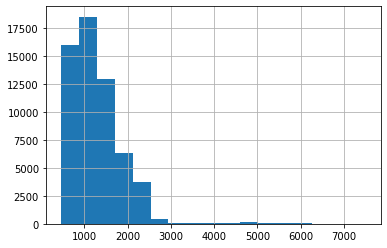

In [110]:
df['WarrantyCost'].hist(bins=17)

In [109]:
df['WarrantyCost'].mean() #media

1276.105042304662

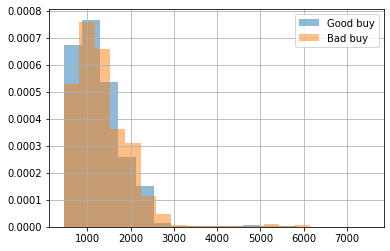

In [114]:
df[df['IsBadBuy']==0]['WarrantyCost'].hist(bins=17, 
                                   label='Good buy', alpha=0.5, density=True)
df[df['IsBadBuy']==1]['WarrantyCost'].hist(bins=17,
                                  label='Bad buy', alpha=0.5, density=True)
plt.legend()
plt.show()

### - Prime Unit & AUCGUART
identifies the level of demand with respect to a standardpurchase

In [29]:
df['PRIMEUNIT'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [30]:
df['PRIMEUNIT'].value_counts()

NO     2627
YES      56
Name: PRIMEUNIT, dtype: int64

In [31]:
df['AUCGUART'].unique()

array([nan, 'GREEN', 'RED'], dtype=object)

In [8]:
df['AUCGUART'].isnull().value_counts(normalize= True)

True     0.954047
False    0.045953
Name: AUCGUART, dtype: float64

In [9]:
df['PRIMEUNIT'].isnull().value_counts(normalize= True)

True     0.954047
False    0.045953
Name: PRIMEUNIT, dtype: float64

### - Check BYRNO

In [33]:
df['BYRNO'].unique()

array([ 5546, 99750, 99761, 20833, 21053, 99740, 20234, 18880, 18111,
       19619, 18822, 22916, 17212, 20740,   835, 17675, 52598,  3453,
       23359,  1191, 21047, 19662,  8655,  1231, 16044, 20928, 20207,
       22808,  1235, 18881, 25100, 10315, 16926, 21973, 19064,  8172,
       20392, 19638, 52646, 52644, 23657,  1045, 52117,  1035, 52492,
        1121,  1151, 10430, 10310, 11410,  1156,  1085, 53245, 18091,
        1081,  1125,  1031,  1051,  1041,  1141, 99741, 10410,  1157,
       16369, 10510,  1152, 11210,  1055, 10425,  1082,  1086, 10420],
      dtype=int64)

<p>The same ID buys more than one car</p>

AttributesSelection:
 Attributes, like[WheelTypeId]and[VNZIP1], areremovedbecause they are identical to [WheelType] and [VNST]. The only difference theyhaveistheattributetype. Theattributes[PRIMEUNIT]and[AUCGUARD]mostlyhave null values, only 2% of the values are assigned, so they must be removed. Aswell as attributes like [SubModel] and [Trim] are unnecessary and contain hugecategorical data which can affect the performance of the classiﬁer. Therefore theymust be removed

### feature analysis
We can drop the two features with almost all missing value
(“PRIMEUNIT”, “AUCGUARD”). “RefId” is also
dropped as it is just a unique number with no relation to
prediction. “VehYear” which tells the year a vehicle is
made is dropped because we have “VehicleAge” which
captures the same information. The same scenario
happens with “WheelTypeId” and “WheelType”,
therefore we keep just “WheelTypeID”. The features
“VNZIP1” and “VNST” both describe the location of
the auction where the car is bout, so we kept just
“VNST” this tells us a state instead of a very specific
ZIP.